# Estos modelos fueron hechos con IA, por desgracia fueron el intento desesperado de hacer funcionar y crear un modelo predictivo de nuestro df, cosa que para mi en este caso fue inutil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\ProyectoFinal-EmpresaAliada\\Looker Studio\\FACT_SALES_CONSOLIDATED.csv")

In [3]:
# =========================
# 2. LIMPIEZA DE FECHAS
# =========================
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.dropna(subset=['DATE'])

In [4]:
# =========================
# 3. SELECCIÓN DE COLUMNAS
# =========================
df = df[['DATE', 'TOTAL_VALUE_SALES']]


In [5]:
# =========================
# 4. AGREGACIÓN SEMANAL GLOBAL
# =========================
weekly_sales = (
    df
    .groupby(pd.Grouper(key='DATE', freq='W-SUN'))
    .sum()
    .sort_index()
)

# Forzar continuidad semanal
weekly_sales = weekly_sales.asfreq('W-SUN')
weekly_sales = weekly_sales.dropna()

In [6]:
# =========================
# 5. TRAIN / TEST SPLIT
# =========================
train_size = int(len(weekly_sales) * 0.7)
train = weekly_sales.iloc[:train_size]
test = weekly_sales.iloc[train_size:]


In [7]:

# =========================
# 6. MODELO ARIMA
# =========================
model = ARIMA(train['TOTAL_VALUE_SALES'], order=(1,1,1))
model_fit = model.fit()

In [8]:
# =========================
# 7. VALIDACIÓN
# =========================
pred_test = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test['TOTAL_VALUE_SALES'], pred_test)
rmse = np.sqrt(mean_squared_error(test['TOTAL_VALUE_SALES'], pred_test))

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

MAE: 16,675.33
RMSE: 23,438.25


In [9]:
# =========================
# 8. PREDICCIÓN FUTURA
# =========================
future_steps = 12  # 12 semanas
future_pred = model_fit.forecast(steps=future_steps)

future_dates = pd.date_range(
    start=weekly_sales.index[-1] + pd.Timedelta(weeks=1),
    periods=future_steps,
    freq='W-SUN'
)

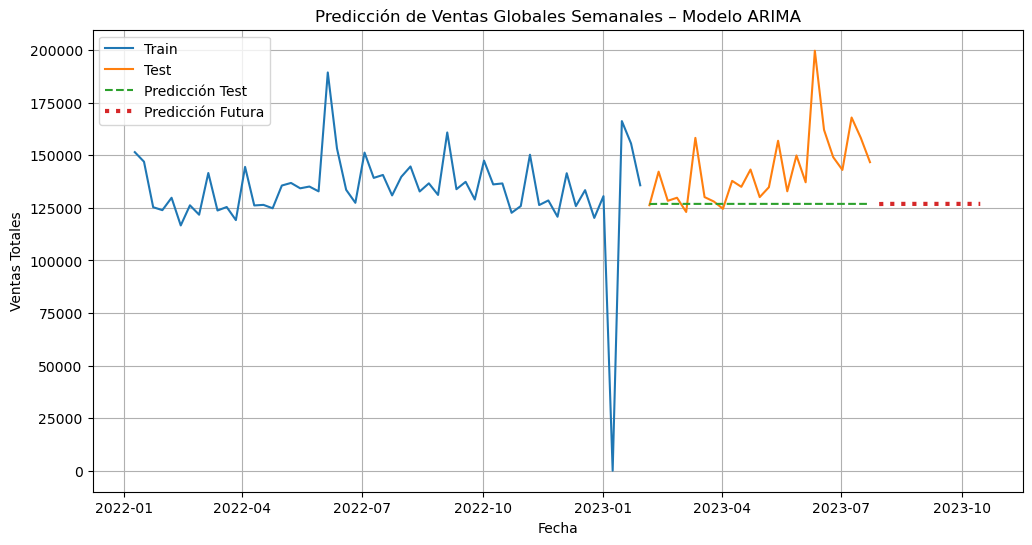

In [10]:
# =========================
# 9. GRÁFICA FINAL
# =========================
plt.figure(figsize=(12,6))

plt.plot(train.index, train['TOTAL_VALUE_SALES'], label='Train')
plt.plot(test.index, test['TOTAL_VALUE_SALES'], label='Test')
plt.plot(test.index, pred_test, linestyle='--', label='Predicción Test')
plt.plot(future_dates, future_pred, linestyle=':', linewidth=3, label='Predicción Futura')

plt.title('Predicción de Ventas Globales Semanales – Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)

plt.show()


Datos de entrenamiento: (97601, 4)
Datos de prueba: (24401, 4)

=== RESULTADOS DEL MODELO ===
Coeficiente R²: 0.8315
Error cuadrático medio (MSE): 38.15
Raíz del error cuadrático (RMSE): 6.18

=== COEFICIENTES DEL MODELO ===
TOTAL_VALUE_SALES: 0.0376
YEAR: -0.2091
MONTH: -0.0189
DAY_OF_WEEK: 0.0182
Intercepto: 422.6092


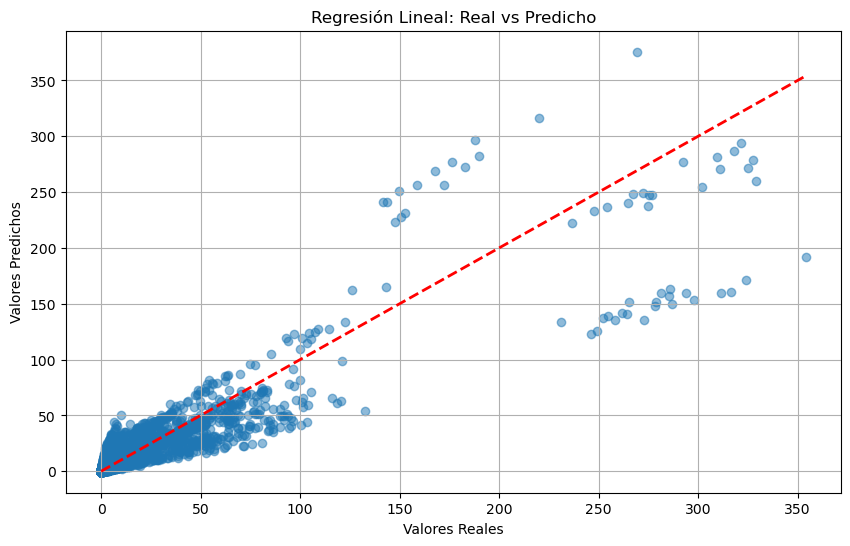


=== EJEMPLO DE PREDICCIÓN ===
Ejemplo 1:
  Valor real: 0.31
  Predicción: 0.40
  Diferencia: 0.09

Ejemplo 2:
  Valor real: 0.05
  Predicción: -0.22
  Diferencia: 0.27

Ejemplo 3:
  Valor real: 4.91
  Predicción: 5.78
  Diferencia: 0.87

=== PREDICCIÓN PARA UNA FECHA FUTURA ===
Predicción para Enero 2024: 187.69 unidades


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar datos
df = pd.read_csv("C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\ProyectoFinal-EmpresaAliada\\Looker Studio\\FACT_SALES_CONSOLIDATED.csv")

# 2. Preparar las variables más simples
# Convertir fecha a datetime y extraer características básicas
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# 3. Seleccionar variables predictoras simples
# Usar solo las numéricas que parecen importantes
X = df[['TOTAL_VALUE_SALES', 'YEAR', 'MONTH', 'DAY_OF_WEEK']]
y = df['TOTAL_UNIT_SALES']

# Eliminar filas con NaN
X = X.dropna()
y = y.loc[X.index]

# 4. Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# 5. Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = modelo.predict(X_test)

# 7. Evaluar el modelo
print("\n=== RESULTADOS DEL MODELO ===")
print(f"Coeficiente R²: {r2_score(y_test, y_pred):.4f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Raíz del error cuadrático (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# 8. Mostrar coeficientes
print("\n=== COEFICIENTES DEL MODELO ===")
for i, col in enumerate(X.columns):
    print(f"{col}: {modelo.coef_[i]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")

# 9. Gráfica simple: Valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Real vs Predicho')
plt.grid(True)
plt.show()

# 10. Ejemplo de predicción
print("\n=== EJEMPLO DE PREDICCIÓN ===")
ejemplo = X_test.iloc[0:3].copy()
predicciones = modelo.predict(ejemplo)

for i in range(3):
    print(f"Ejemplo {i+1}:")
    print(f"  Valor real: {y_test.iloc[i]:.2f}")
    print(f"  Predicción: {predicciones[i]:.2f}")
    print(f"  Diferencia: {abs(y_test.iloc[i] - predicciones[i]):.2f}")
    print()

# 11. Predicción para una fecha futura (ejemplo)
print("=== PREDICCIÓN PARA UNA FECHA FUTURA ===")
futuro = pd.DataFrame({
    'TOTAL_VALUE_SALES': [5000],  # Valor de ejemplo
    'YEAR': [2024],
    'MONTH': [1],
    'DAY_OF_WEEK': [0]  # Lunes
})

prediccion_futura = modelo.predict(futuro)
print(f"Predicción para Enero 2024: {prediccion_futura[0]:.2f} unidades")